In [38]:
from random import uniform
from math import sqrt, log, exp, pi

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

In [39]:
df = pd.read_csv("bimodal_example.csv")
df.head(n=5)

,x
0,0.252851
1,-1.034562
2,3.319558
3,4.552363
4,-0.775995


In [40]:
data = df.x

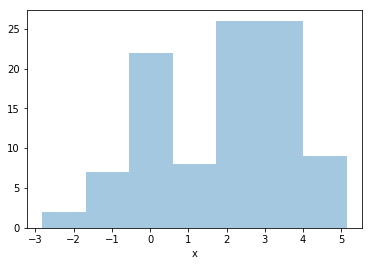

In [41]:
sns.distplot(data,
             kde=False);

Is the normal distribution a useful model for the data?

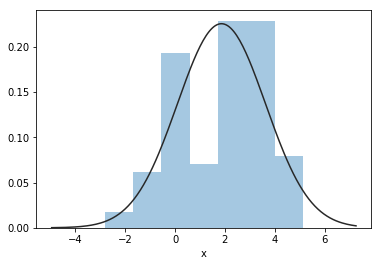

In [42]:
sns.distplot(data,
             fit=stats.norm,
             kde=False,);

__TODO__: Plot a KDE on the data:

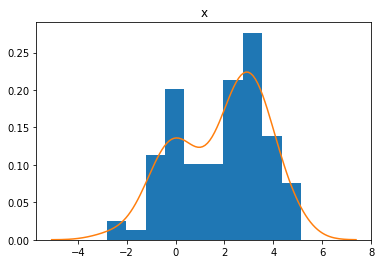

In [43]:
df.hist(grid=False,
       normed=True);
sns.kdeplot(data,
           legend=False);

__TODO__:  What model should we fit?

__Solution__:  
> 

__TODO__:  Define the model:

<br>
<details><summary>
Click here for a small hint…
</summary>
The model is should be the simplest that is able generate that figure
</details>
<br>
<details><summary>
Click here for a big hint…
</summary>
The model is two Normal distributions
</details>

__Solution__:   
In the Normal mixture example, we have two Normal distributions $N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$. 



__TODO__:  List the model parameters:

<br>
<details><summary>
Click here for a small hint…
</summary>
There are 5 paramaters
</details>
<br>
<details><summary>
Click here for a big hint…
</summary>

</details>


__Solution__:   
Let $w$ be the probability that the data comes from the first Normal, the parameter in this model is $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$.

__TODO__:  Define pdf:

__Solution__:  
The PDF is:


$$f(x | \theta) = w \  f_1(x \ | \  \mu_1, \sigma_1^2) + (1 - w) \  f_2 (x  \ | \  \mu_2, \sigma_2^2) $$  


$X$ is the observed data, $Z$ is the unobserved class membership.   

Let $Z = 1$ if the data comes from the first Normal, and $0$ otherwise, then $E(Z) = w$. 

__TODO__:  Write the E  step. Either formally or informally.

__Solution__:  
* In the E step we can obtain:   

$$ \pi_i = E(Z \ | \  x_i, \theta^{(t)}) = \frac{w^{(t)} \ f_1(x_i \ |\ \mu_1^{(t)}, \sigma_1^{2^{(t)}})}{w^{(t)} \ f_1(x_i \ |\ \mu_1^{(t)}, \sigma_1^{2^{(t)}}) + (1 - w^{(t)}) \ f_2(x_i \ |\ \mu_2^{(t)}, \sigma_2^{2^{(t)}})} $$


__TODO__:  Write the M step. Either formally or informally.

__Solution__:  
* In the M step, we have the familiar MLE of the parameters:  

$$ \mu_1^{(t + 1)} = \frac{\sum_{i = 1}^n \pi_i x_i}{\sum_{i = 1}^n \pi_i} $$



$$ \sigma_1^{2^{(t + 1)}} = \frac{\sum_{i = 1}^n \pi_i (x_i - \mu_1^{(t + 1)})^2}{\sum_{i = 1}^n \pi_i} $$  



$$ \mu_2^{(t + 1)} = \frac{\sum_{i = 1}^n (1 - \pi_i) x_i}{\sum_{i = 1}^n (1 - \pi_i)} $$



$$ \sigma_2^{2^{(t + 1)}} = \frac{\sum_{i = 1}^n (1 - \pi_i) (x_i - \mu_2^{(t + 1)})^2}{\sum_{i = 1}^n (1 - \pi_i)} $$  



$$ w^{(t + 1)} = \frac{1}{n} \sum_{i = 1}^n \ \pi_i $$  

* Iterate these steps until convergence.  

In [57]:
# Solution:  

# uni_loglike = sum(log(g_single.pdf(d)) for d in data)
# print('Log likelihood: {:4.6}'.format(uni_loglike))

Best single Guassian: μ = 1.9, σ = 1.8


In [58]:
# TODO: 

In [59]:
# Solution:  


Computing best model with random restarts...



/Users/brianspiering/anaconda3/envs/gmm/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


Done. 🙂


In [75]:
print('Best Guassian Mixture:')
print(f'1st Guassian: μ = {best_mix.one.mu:.2}, σ = {best_mix.one.sigma:.2}')
print(f'2nd Guassian: μ = {best_mix.two.mu:.2}, σ = {best_mix.two.sigma:.2}')
print(f'Guassian mixture: {best_mix.mix:.2}')

Best Guassian Mixture:
1st Guassian: μ = -0.037, σ = 1.0
2nd Guassian: μ = 3.1, σ = 0.85
Guassian mixture: 0.39


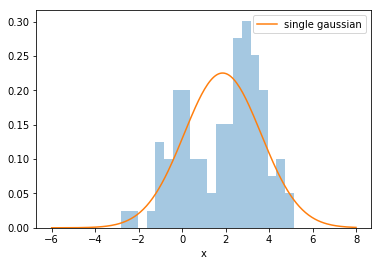

In [76]:
g_single

array([  1.17155602e-05,   1.39663604e-05,   1.66233097e-05,
         1.97544897e-05,   2.34384129e-05,   2.77654460e-05,
         3.28393971e-05,   3.87792819e-05,   4.57212839e-05,
         5.38209227e-05,   6.32554468e-05,   7.42264659e-05,
         8.69628384e-05,   1.01723828e-04,   1.18802548e-04,
         1.38529695e-04,   1.61277606e-04,   1.87464625e-04,
         2.17559801e-04,   2.52087926e-04,   2.91634907e-04,
         3.36853475e-04,   3.88469231e-04,   4.47287011e-04,
         5.14197564e-04,   5.90184514e-04,   6.76331589e-04,
         7.73830069e-04,   8.83986429e-04,   1.00823011e-03,
         1.14812135e-03,   1.30535907e-03,   1.48178862e-03,
         1.67940942e-03,   1.90038234e-03,   2.14703662e-03,
         2.42187645e-03,   2.72758683e-03,   3.06703867e-03,
         3.44329305e-03,   3.85960435e-03,   4.31942220e-03,
         4.82639199e-03,   5.38435386e-03,   5.99733991e-03,
         6.66956948e-03,   7.40544234e-03,   8.20952965e-03,
         9.08656241e-03,

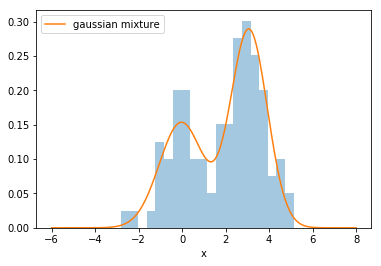

In [73]:
sns.distplot(data, bins=20, kde=False, norm_hist=True)
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
plt.legend();

----
Challenge Activities
------

Plot the estimated pdfs, univariate and mixture

----
Lame attempts at plotting
----

In [ ]:
# Plot fitted values
# df.hist(grid=False);
# x_values = x_values.sort()#np.arange(-4, 5, 0.001)
# plt.plot(x_values, stats.norm.pdf(x_values, g_single.mu, g_single.sigma**2)*10); # pdf has wrong scale

In [ ]:
# Automated fit values; should be the same as my model
sns.distplot(data, fit=stats.norm, kde=False);

In [ ]:
# Lame mu line
df.hist(grid=False);
plt.axvline(g_single.mu, color='g', linestyle='solid');

In [ ]:
# TODO: plot both estimated univariate normal pdfs
# df.hist(grid=False);

In [ ]:
# If 1 mu line is lame, two are lamer!
df.hist(grid=False);
plt.axvline(best_mix.one.mu, color='r', linestyle='solid');
plt.axvline(best_mix.two.mu, color='m', linestyle='solid');

<br>
<br>